# The VGG16 Convolutional Neural Network

![VGG16](vgg16.jpg)

### Import the VGG16 Network

In [33]:
from keras import applications
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
model = applications.VGG16(include_top=False, weights='imagenet')

layer_dict = dict([(layer.name, layer) for layer in model.layers])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [9]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

### Function for maximizing filter activation

####  loss function: \begin{align*}
 &\mathcal{L}(image, model\_parameters) = mean\_filter\_output \\
 & \nabla_{image}\mathcal{L} (image, model\_parameters)
\end{align*}

In [30]:
def plot_filter(img_width,img_height, n_filters, step, nstep, layer_name,n_col, rand_mean, rand_var):
    input_img = model.input
    n_row = n_filters//n_col
    fig, ax = plt.subplots(n_row,n_col,figsize=(n_col*3,3*n_row))
    L = layer_dict[layer_name].output_shape[-1]
    R = np.random.choice(L, size=n_filters, replace=False, p=None)
    j = 0
    for k in R:
        loss_value = 0
        filter_index = k
        while loss_value < 0.001:
            filter_index += 1
            layer_output = layer_dict[layer_name].output
            loss = K.mean(layer_output[..., filter_index])
            grads = K.gradients(loss, input_img)[0]
            grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
            iterate = K.function([input_img], [loss, grads])
            img_opt = np.random.random((1, img_width, img_height,3)) * rand_var + rand_mean
            loss_value, grads_value = iterate([img_opt])
        
        for i in range(nstep):
            loss_value, grads_value = iterate([img_opt])
            
            img_opt += grads_value * step
            if loss_value < 0.001:
                img_opt += np.random.random((1, img_width, img_height,3)) * 20 +10
                #        print(loss_value,k) 
        ax[j//n_col,j%n_col].imshow(deprocess_image(img_opt[0]))
        ax[j//n_col,j%n_col].axis('off')
        j = j + 1
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

### Block 1 Conv 1

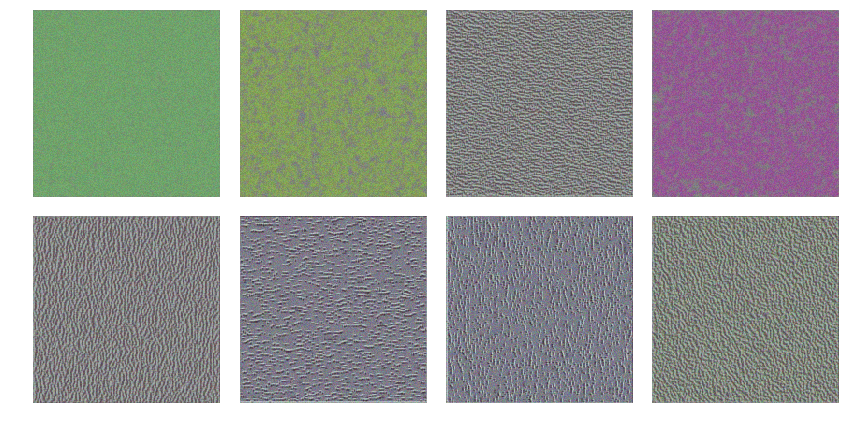

In [132]:
plot_filter(rand_mean=128, rand_var = 20, =img_width=200,img_height=200, n_filters=8, n_col = 4, step=0.5, nstep =40, layer_name = 'block1_conv1')

### Block 3 Conv 1

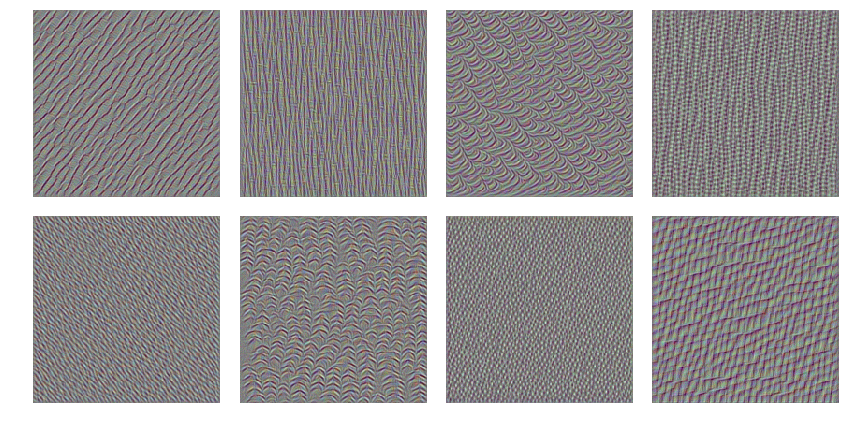

In [112]:
plot_filter(rand_mean =128,img_width=200,img_height=200, n_filters=8, n_col = 4, step=0.5, nstep =40, layer_name = 'block3_conv1')

### Block 4 Conv 3

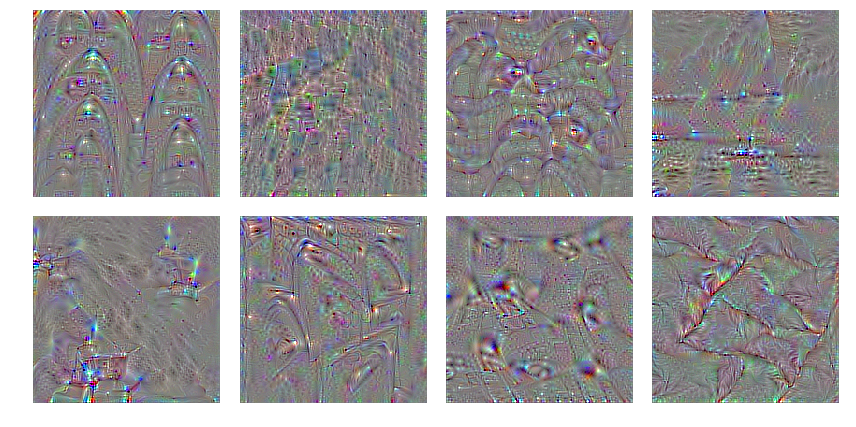

In [32]:
plot_filter(rand_var = 10, rand_mean =128,img_width=200,img_height=200, n_filters=8, n_col = 4, step=0.5, nstep =160, layer_name = 'block5_conv3')

### Block 5 Conv 3

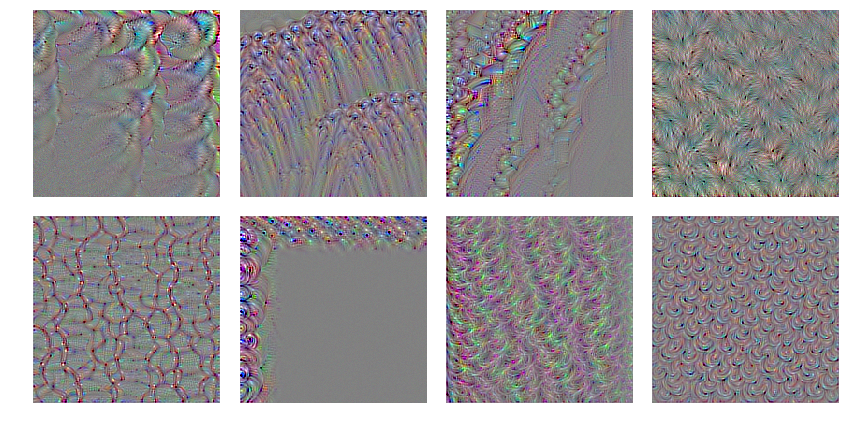

In [14]:
plot_filter(rand_mean =-40,img_width=200,img_height=200, n_filters=8, n_col = 4, step=0.5, nstep =160, layer_name = 'block4_conv3')

### Optimization of an image for the activation corresponding to the Magpie category.

![title](magpie.jpg)

### Magpie

![title](magpie_true.jpg)

### Confusing Deep Neural Networks
![image](confusion.png)

#### Regularized Optimization
![image](vis_reg.jpg)